### Dataset Description
Lets imagine we are an HR Department and we want to hire someone. And we actually found someone who seems to be a great fit for the job. So we would like the person to offer a job. And this person says YES. But at the end of the interview process comes the question "WHAT IS YOUR SALARY EXPECTATION". Lets say the person ask for $150k per year. HR asks why are you expecting such a high salary ? This person replies that's what I earned in my previous job. Is that a truth or is that a bluff ?. That is what we are going to figure out in this model "find out the previous salary of this candidate"

### Facts about candidate
1. Was Regional Manager
2. His salary should not be $150k but instead around $150k to $200k beacause he worked for 2 years
3. Looking at the experience and taking his level to be around 6-7 (6.5) we are going to check if he is telling the truth or not

### New Skill
predict on single observation

# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset

As we can see that the **Position** also corresponds to the **Level** therefore the 1st column is redundant. Its like we've already encoded the **String** to **Numeric** Values

In [6]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[ : , 1:-1].values
Y = dataset.iloc[ : ,  -1].values
print("X: ",X)
print("\nY: ",Y)

X:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Y:  [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Train Test Split (Skipped)
To leverage maximum data coverage for future prediction

# Train the Linear Regression on the Whole Dataset

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

# Train the Polynomial Regression on the Whole Dataset

#### Process
1. Create a matrix of powered features. But not containing different features like $X_1^1, X_1^2 \;or\; X_1^n$ but a matrix of feature containing $X_1^1$ as $1^{st}$ feature and $X_1^2$ as $2^{nd}$ feature ... (*Call it **x_poly***)
2. Then we will create a LinearRegressor object, to integrate this **Powered Features** with the **Matrix of Features** in this new LinearRegressor

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=4) # This will help choose the N
x_poly =poly_feat.fit_transform(X) # turn this matrix of 1 feature into matrix of X1 as 1st feeature X1^2 as 2nd feature etc

poly_reg = LinearRegression()
poly_reg.fit(x_poly, Y)

LinearRegression()

Now we have the matrix of features of **position levels** and **squares of position levels**

# Visualize the Linear Regression Results

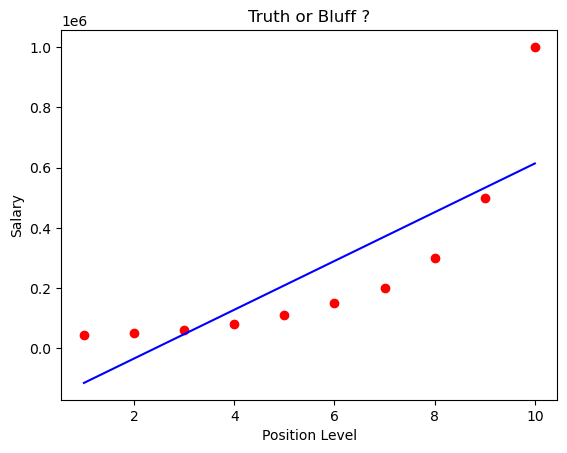

In [21]:
plt.scatter(X,Y,color='red') # display points
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth or Bluff ?')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Visualize the Polynomial Regression Results

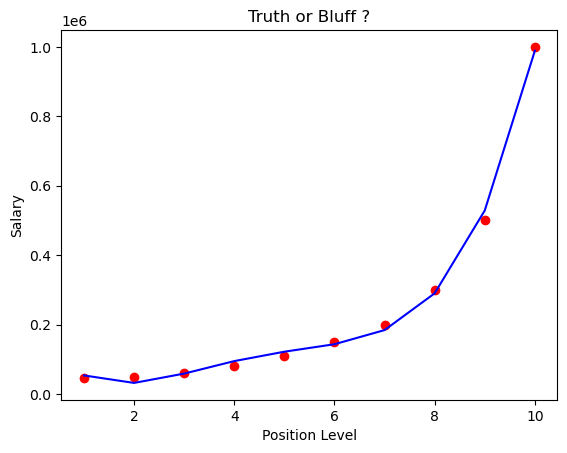

In [22]:
plt.scatter(X,Y,color='red') # display points
plt.plot(X,poly_reg.predict(x_poly),color='blue') # needs a transformed feature for powers of X therfore it simply cant be X
plt.title('Truth or Bluff ?')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Visualize Polynomial Regression for Higher Resolution and Smooth Curves

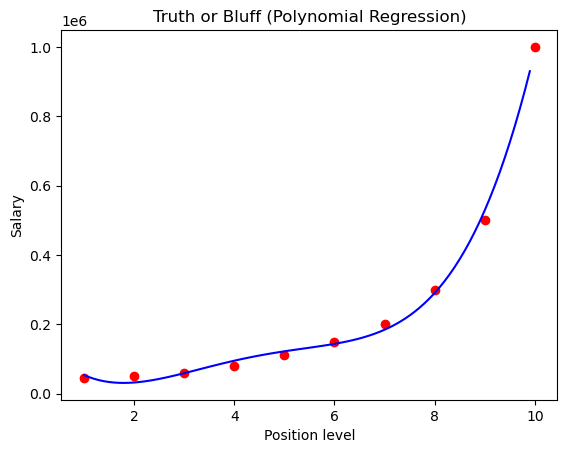

In [26]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, poly_reg.predict(poly_feat.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Predict New Result With Linear Regression

In [34]:
lin_reg.predict([[6.5]]) # Requires Array [[]]

array([330378.78787879])

Since the person said that his previous salary was $150k, but here the model predicts its $330k so its not correct. Assumption using **Linear Regression Failed**

# Preduct New Result With Polynomial Regression

prediction should be done like $6.5x_1^1$ + $6.5x_1^2$ + ... + $6.5x_1^n$

In [37]:
poly_reg.predict(poly_feat.fit_transform([[6.5]]))

array([158862.45265153])

# Result
We found that the person is speaking the truth and he will get the Job